In [110]:
import tensorflow as tf
import pandas as pd #reading and processing datas
import seaborn as sns #for charts
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,Huber
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,InputLayer,Normalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import RootMeanSquaredError
import numpy as np
from sklearn.metrics import confusion_matrix

In [111]:
data=pd.read_csv("train.csv")

# New Section

In [112]:
print(data.head())
data.shape

   v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5  


(1000, 12)

In [113]:
# for col in ['condition','v.id','on road old','on road now','years','km','rating','condition','economy','top speed','hp','torque','current price']:
#   print(f"{col}: {data[col].dtype}, Shape: {data[col].shape}")

In [114]:
# sns.pairplot(data[['condition','v.id','on road old','on road now','years','km','rating','economy','top speed','hp','torque','current price']],diag_kind='kde')

In [115]:
data_tensor=tf.convert_to_tensor(data)
data_tensor=tf.cast(data_tensor,tf.float32)
data_tensor

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [116]:
x=data_tensor[:,3:-1]
print(x.shape)
y=data_tensor[:,-1]
y=tf.expand_dims(y,axis=1)
print(y.shape)

(1000, 8)
(1000, 1)


In [117]:
Train_ratio=0.8
Val_ratio=0.1
Test_ratio=0.1
data_size=len(x)

In [118]:
norm=Normalization()
norm.adapt(x)
print(norm(x))

tf.Tensor(
[[-0.90849847 -0.7320676  -1.417883   ...  0.52425617 -0.56303596
   0.9301041 ]
 [ 0.83749485  0.58160454  1.4350004  ... -0.9799921  -0.5142714
  -0.40017685]
 [-1.4904962   1.107348   -0.70466214 ...  0.7317387  -1.538328
  -0.3051568 ]
 ...
 [ 1.4194926  -0.46514592 -1.417883   ...  1.5097982   1.3875481
  -0.68523705]
 [-1.4904962   1.3798641   0.7217796  ...  0.8873506   1.3387835
   1.1676543 ]
 [ 0.2554971  -1.1319182   0.7217796  ...  1.66541     0.7048437
  -0.35266683]], shape=(1000, 8), dtype=float32)


In [119]:
xtrain=x[:int(data_size*Train_ratio)]
ytrain=y[:int(data_size*Train_ratio)]
valx=x[int(data_size*Train_ratio):int(data_size*(Train_ratio+Val_ratio))]
valy=y[int(data_size*Train_ratio):int(data_size*(Train_ratio+Val_ratio))]
testx=x[int(data_size*(Train_ratio+Val_ratio)):]
testy=y[int(data_size*(Train_ratio+Val_ratio)):]

In [132]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    norm,
    Dense(32),
    Dense(8),
    Dense(1),
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization)      │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 578 (2.26 KB)

 Trainable params: 561 (2.19 KB)

 Non-trainable params: 17 (72.00 B)

In [133]:
model.compile(optimizer=Adam(learning_rate=1.0),loss=Huber(),metrics=[RootMeanSquaredError()])

In [134]:
history = model.fit(xtrain,ytrain,validation_data=(valx,valy),epochs=100,verbose=0)

In [135]:
history.history

{'loss': [190772.984375,
  51581.94921875,
  39881.80078125,
  40713.4921875,
  43017.8515625,
  38549.6640625,
  40536.78515625,
  39168.73046875,
  43386.80859375,
  40408.68359375,
  38764.4140625,
  39918.2890625,
  40890.24609375,
  42586.2890625,
  43117.37109375,
  39414.9765625,
  39068.03125,
  41269.42578125,
  42693.765625,
  40362.9765625,
  42169.43359375,
  40998.6328125,
  40007.70703125,
  39522.546875,
  39932.11328125,
  39797.79296875,
  43644.765625,
  38782.921875,
  37626.9453125,
  39976.16015625,
  38396.84765625,
  39864.9140625,
  38849.7421875,
  39169.30859375,
  40725.03125,
  37681.87109375,
  37402.4375,
  39143.296875,
  36454.484375,
  36446.53125,
  37412.328125,
  38438.515625,
  37338.62890625,
  39221.09375,
  38768.62109375,
  40363.4921875,
  37710.3984375,
  36758.7890625,
  39485.96484375,
  39664.7890625,
  38665.984375,
  41402.37890625,
  38640.71484375,
  37531.80078125,
  39791.88671875,
  37377.8984375,
  39386.76953125,
  37663.60546875,


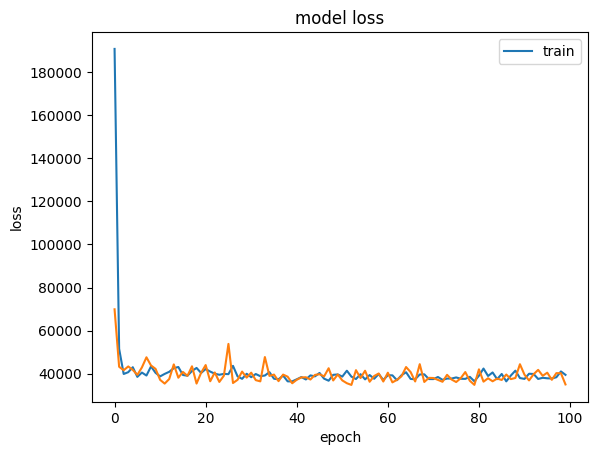

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

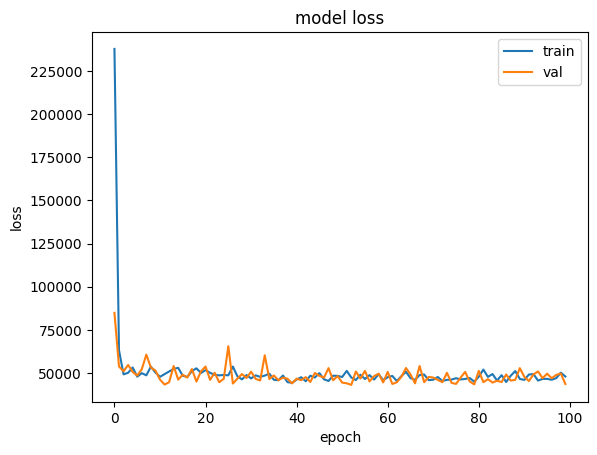

In [137]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'])
plt.show()

In [145]:
model.evaluate(testx,testy)
y_true = list(testy[:,0].numpy())
predy2=model.predict(testx)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36422.4062 - root_mean_squared_error: 45402.5703 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [139]:
predy=list(model.predict(testx)[:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [140]:
print(predy)

[153018.61, 431266.38, 235155.47, 129348.77, 202164.45, 317739.3, 210652.9, 309016.97, 411427.34, 388512.25, 449559.44, 238572.34, 276638.97, 157665.31, 415322.78, 298993.2, 260726.42, 408861.38, 323711.47, 295963.44, 233003.5, 403909.84, 118571.664, 144110.34, 474868.3, 337231.25, 336595.44, 242295.88, 367875.12, 259668.45, 238198.28, 118008.94, 284684.5, 124182.74, 105603.03, 404758.56, 230282.06, 373654.25, 486931.75, 339172.25, 455692.7, 102686.22, 127109.07, 343357.7, 456329.06, 292975.0, 456865.34, 441270.7, 302099.38, 296655.78, 340533.78, 279228.78, 473501.34, 438278.0, 268695.3, 353724.7, 129994.65, 232647.9, 283991.28, 241124.98, 312454.25, 480132.9, 343705.88, 442781.8, 141446.84, 218435.31, 315294.0, 263543.88, 425522.7, 347567.7, 217398.34, 263368.6, 186859.12, 407580.7, 193073.0, 324437.12, 103106.53, 429564.88, 395368.9, 225749.0, 116981.586, 314790.25, 493759.2, 321105.6, 201641.19, 312264.9, 194890.97, 346272.56, 435239.44, 397748.0, 435382.88, 131052.35, 118760.54, 31

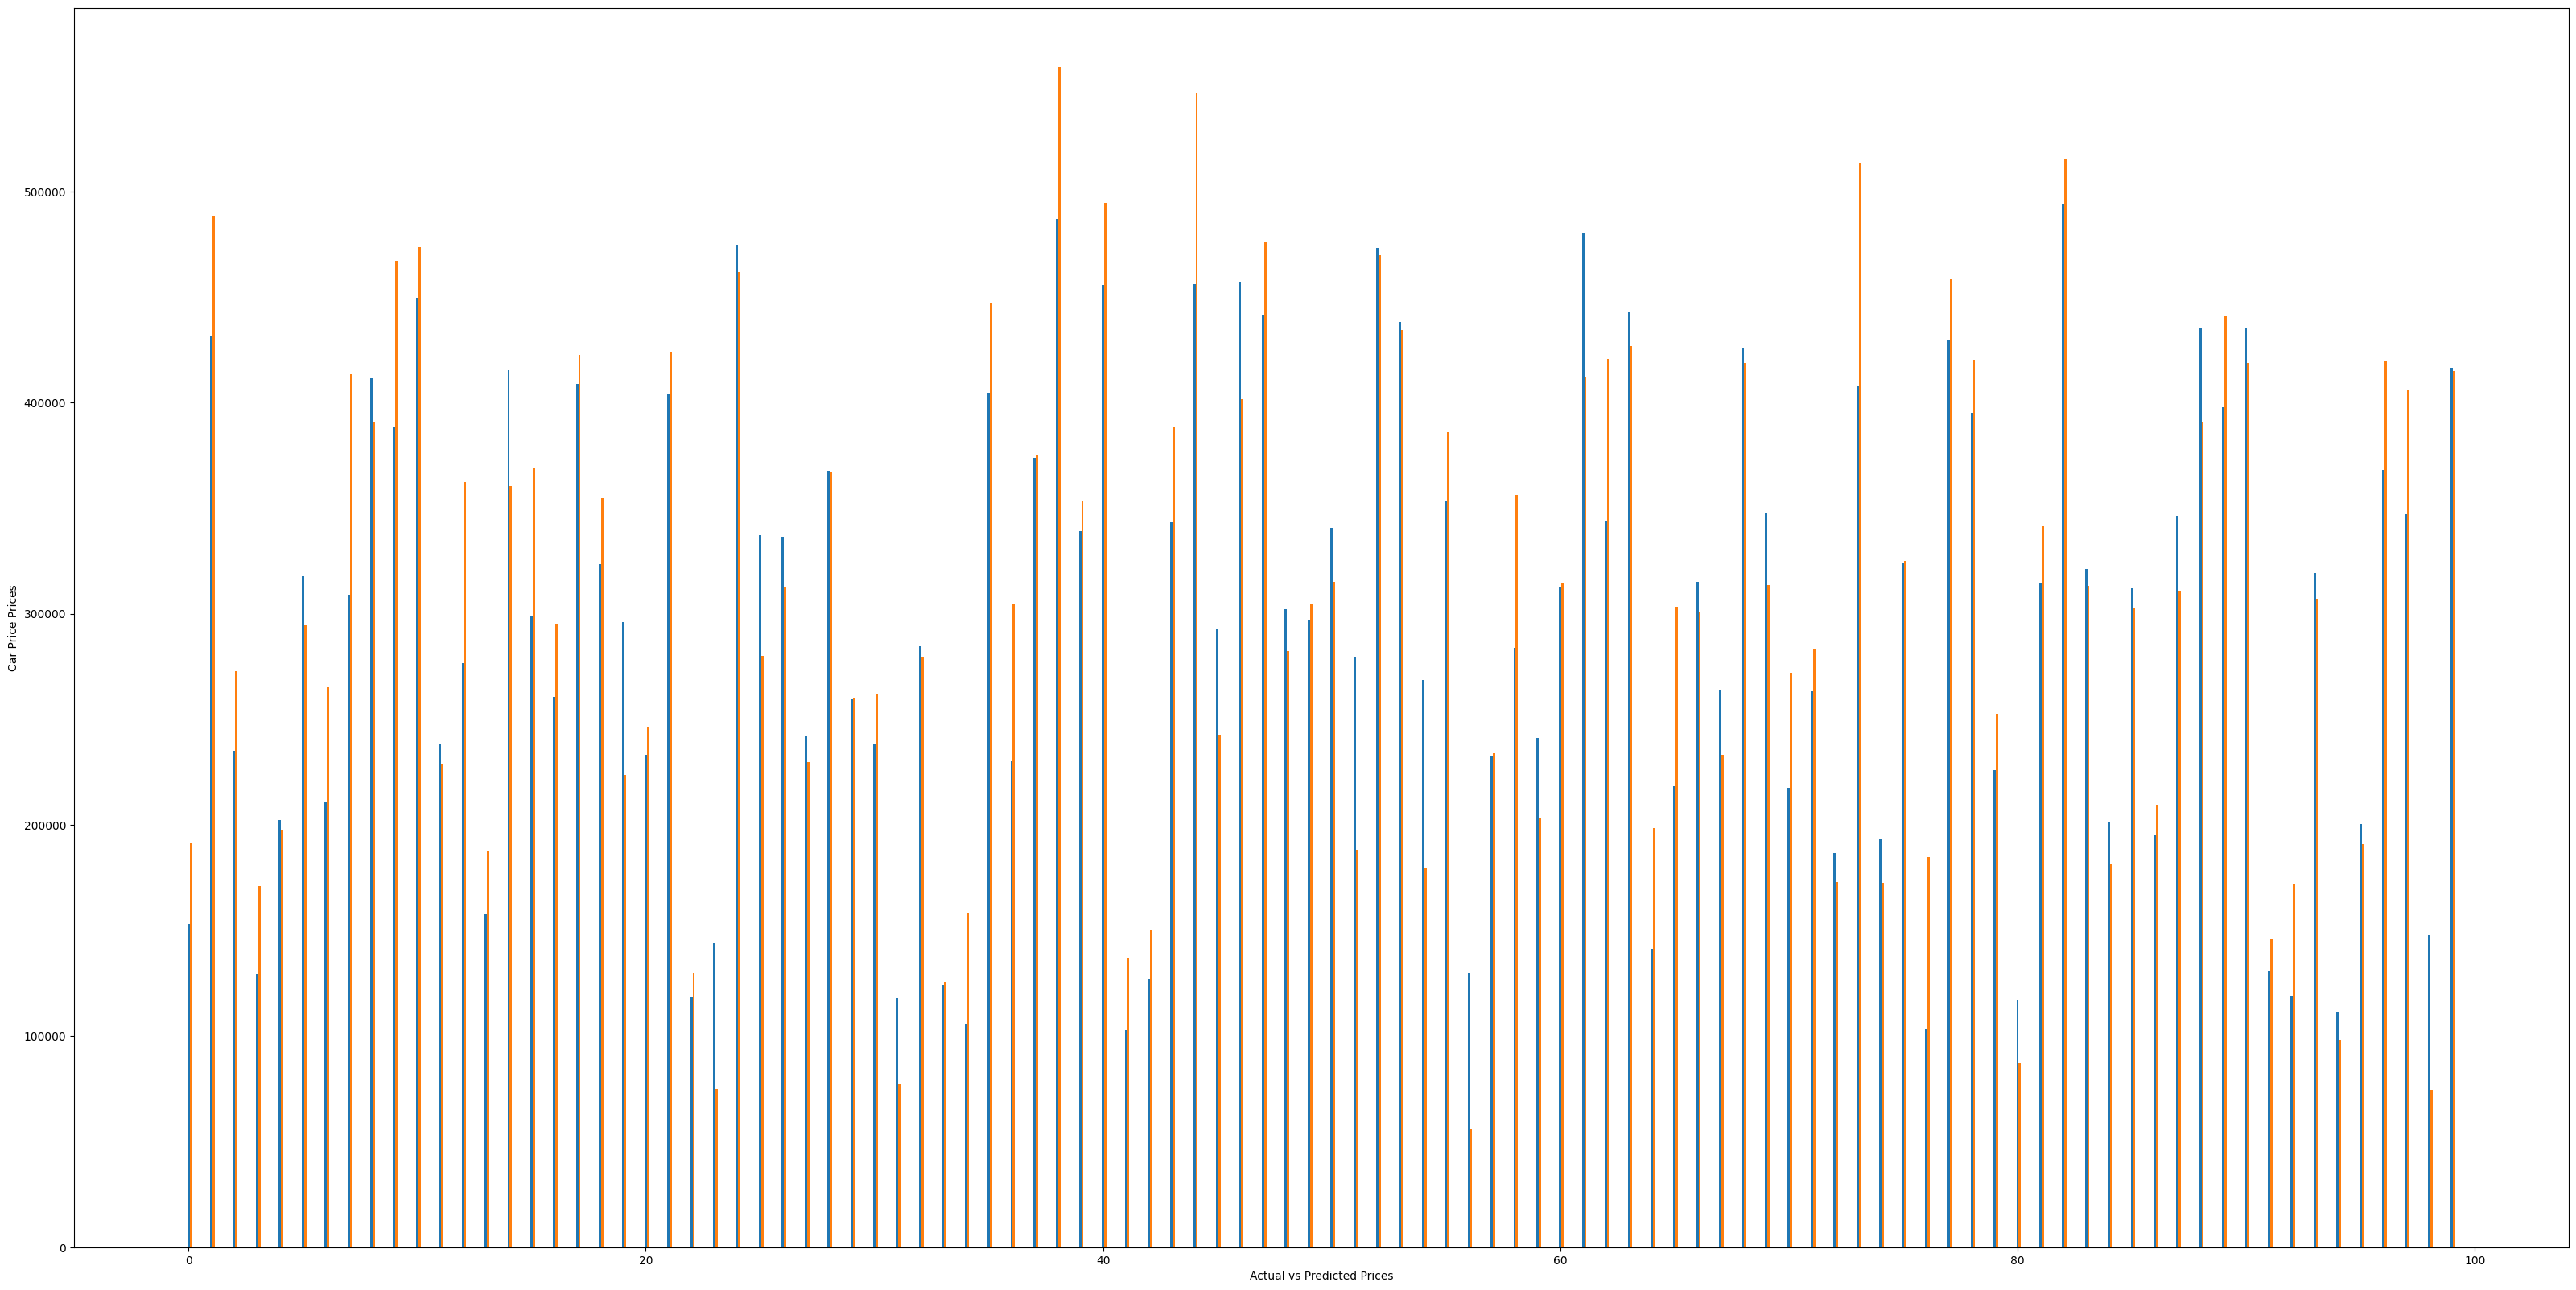

In [141]:
ind = np.arange(100)
plt.figure(figsize=(40,20))

width = 0.1

plt.bar(ind, predy, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()